# Text Summarization in Python

## Motivation: 
The length of textual data is increasing and people have less time. Often the newspaper articles run into a long text of, say 1000 -1200 words. As wearable devices leap to prominence (Google Glass, Apple Watch, to name a few), content must adapt to the limited screen space available on these devices.
The task of generating intelligent and accurate summaries for long pieces of text has become a popular research as well as industry problem.

## Approach: 
Extractive text summarization is all about finding the more important sentences from a document as a summary of that document.
Our approach is using the TextRank algorithm to find these 'important' sentences.

## Implementation

### 1. Importing important libraries

In [1]:
# numpy library helps in working with arrays: array creation and manipulation
# this implementation uses array for storing the matrices generated as 2-D arrays
# PyPDF2 is a library used for reading the PDF files
# sys library has been used for printing the size of data structures used in the program
import numpy as np
import PyPDF2
import sys

In [2]:
# matplotlib is a library that is used to visualize the data by drawing graphs of matrix inputs
# we will use it for drawing the matrices generated later in the program 
# %matplotlib inline is a command used to show the graphs in the jupyter notebook

import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
# networkx library helps in working with graphs ...
# and later performing the PageRank algorithm ...
# which is the crux of this implementation to find ...
# the importance of each sentence using their 'rank' as a metric ...
# rank, the output of the method textrank, is a measure of importance of sentences
# this library has been used in the cell no. ()

import networkx as nx

In [4]:
# the PunktSentenceTokenizer library is being imported from the file punkt.py contained in package nltk.tokenize 
# this is used to tokenize the document into sentences

# Tokenization: Tokenization is the process of demarcating and possibly classifying.. 
# sections of a string of input characters. 
# The resulting tokens are then passed on to some other form of processing. 

from nltk.tokenize.punkt import PunktSentenceTokenizer

In [5]:
# TfidfTransformer and CountVectorizer libraries are being imported

# CountVectorizer: In this implementation, a CountVectorizer object is being created that ..
# will be used for creating the document-term matrix

# tFidTransformer: In this implementation,TfidfTransformer is used for executing the method fit_transform()... 
# which provides the output as a document-term matrix normalized (value 0-1) according to the TF-IDF
# TF(Term Frequency): the no. of times a term(a word here) appears in the current document(single sentence here)
# IDF(Inverse Document Frequency): the no. of times a term(a word here) appears in the entire corpus
# Corpus: set of all sentences


from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

### 2.  Function to read the document from user
Supported formats: .txt, .pdf 

Input: Takes the name of the file as input. 

Output: Returns a string output containing the contents of the file.

In [6]:
# Take the document as an input
def readDoc():
    name = input('Please input a file name: ') 
    print('You have asked for the document {}'.format(name))

    # now read the type of document
    if name.lower().endswith('.txt'):
        choice = 1
    elif name.lower().endswith('.pdf'):
        choice = 2
   
    # Case 1: if it is a .txt file
        
    if choice == 1:
        f = open(name, 'r')
        document = f.read()
        f.close()
            
    # Case 2: if it is a .pdf file
    
    elif choice == 2:
        pdfFileObj = open(name, 'rb')
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
        pageObj = pdfReader.getPage(0)
        document = pageObj.extractText()
        pdfFileObj.close()
    
    # Case 3: none of the format
    else:
        print('Failed to load a valid file')
        print('Returning an empty string')
        document = ''
    
    return document

### 3. Function to tokenize the document
Input: String of text document

Output: A list containing sentences as its elements

In [7]:
# the function used for tokenizing the sentences

def tokenize(document):
    # We are tokenizing using the PunktSentenceTokenizer
    # we call an instance of this class as doc_tokenizer
    doc_tokenizer = PunktSentenceTokenizer()
    
    # tokenize() method: takes our document as input 
    # and returns a list of all the sentences in the document
    
    # sentences_list is a list containing each sentence of the document as an element
    sentences_list = doc_tokenizer.tokenize(document)
    print(type(sentences_list))
    return sentences_list

### 4. Read the document

In [8]:
# reading a file and 
# printing the size of the file
document = readDoc()
print('The size of the file is: {}'.format(sys.getsizeof(document)))
print(type(document))

Please input a file name: Small_doc2.txt
You have asked for the document Small_doc2.txt
The size of the file is: 87
<class 'str'>


### 5. Generate a list of sentences in the document

In [9]:
# we want to tokenize the document for further processing
# tokenizing the sentence means that we are creating a list of all the sentences of the document.
# Need of tokenizing the document: Initially the document is in just a string format.
# if we want to process the document, we need to store it in a data structure.
# Tokenization of document into words is also possible, but we will go with the tokenizing with the sentences
# Since we want to choose the most relevant sentences, we need to generate tokens of sentences only

sentences_list = tokenize(document)
#for i in sentences_list:
    
# let us print the size of memory used by the list sentences
print('The size of the list in Bytes is: {}'.format(sys.getsizeof(sentences_list)))

# the size of one of the element of the list
print('The size of the item 0 in Bytes is: {}'.format(sys.getsizeof(sentences_list[0])))

<class 'list'>
The size of the list in Bytes is: 104
The size of the item 0 in Bytes is: 67


In [10]:
# let us see the data type of sentences_list
# It will be list
print(type(sentences_list))

<class 'list'>


In [11]:
# print the elements of the list
# If the input document is long, which on realistically will be wrong, we would not like to print the entire document
for i in sentences_list:
    print(i)

Run for your life.
Life is beautiful!


### 6. Generate term-document matrix (TD matrix) of the data 

In [12]:
# fit_transform method of CountVectorizer() class 
# Learn the vocabulary dictionary and return term-document matrix. 
# I/p: list of sentences
# O/p: The term-document matrix named cv_matrix
cv = CountVectorizer(stop_words='english')
cv_matrix = cv.fit_transform(sentences_list)

# list of stopwords: https://gist.github.com/sebleier/554280

**So what does CountVectorizer.fit_transform() do?**

In [13]:
# a demo of what CountVectorizer().fit_transform(text) does
cv_demo = CountVectorizer(stop_words='english') # a demo object of class CountVectorizer

# I have repeated the words to make a non-ambiguous array of the document text matrix 

text_demo = ["Ashish is good, you are bad", "I always not bad"] 
res_demo = cv_demo.fit_transform(text_demo)
print('Result demo array is {}'.format(res_demo.toarray()))

# Result is 2-d matrix containing document text matrix
# Notice that in the second row, there is 2.
# also, bad is repeated twice in that sentence.
# so we can infer that 2 is corresponding to the word 'bad'
print('Feature list: {}'.format(cv_demo.get_feature_names()))
print('')
print('')
normal_matrix = TfidfTransformer().fit_transform(res_demo)
print(normal_matrix.toarray())

# why no I?
# ans: https://stackoverflow.com/questions/20717641/countvectorizer-i-not-showing-up-in-vectorized-text

Result demo array is [[1 1 1]
 [0 1 0]]
Feature list: ['ashish', 'bad', 'good']


[[0.6316672  0.44943642 0.6316672 ]
 [0.         1.         0.        ]]


In [14]:
# printing the cv_matrix type
# and how it is being stored in memory?
# it is stored in the compressed row format
# compressed row format: 
print('The data type of bow matrix {}'.format(type(cv_matrix)))
print('Shape of the matrix {}'.format(cv_matrix.get_shape))
print('Size of the matrix is: {}'.format(sys.getsizeof(cv_matrix)))
print(cv.get_feature_names())
print(cv_matrix.toarray())

The data type of bow matrix <class 'scipy.sparse.csr.csr_matrix'>
Shape of the matrix <bound method spmatrix.get_shape of <2x3 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>>
Size of the matrix is: 56
['beautiful', 'life', 'run']
[[0 1 1]
 [1 1 0]]


In [15]:
# Tnormalized: document-term matrix normalized (value 0-1) according to the TF-IDF
# TF(Term Frequency): the no. of times a term(a word here) appears in the current document(single sentence here)
# IDF(Inverse Document Frequency): the no. of times a term(a word here) appears in the entire corpus
# Corpus: set of all sentences



normal_matrix = TfidfTransformer().fit_transform(cv_matrix)
print(normal_matrix.toarray())

[[0.         0.57973867 0.81480247]
 [0.81480247 0.57973867 0.        ]]


In [16]:
print(normal_matrix.T.toarray)
res_graph = normal_matrix * normal_matrix.T
# plt.spy(res_graph)

<bound method _cs_matrix.toarray of <3x2 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Column format>>


Number of edges 3
Number of vertices 2


/home/ashish/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/ashish/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/ashish/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/ashish/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements w

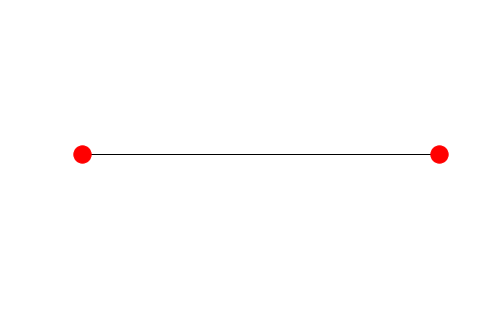

The memory used by the graph in Bytes is: 56


In [17]:
# drawing a graph to proceed for the textrank algorithm
# nx_graph is a graph developed using the networkx library
# each node represents a sentence
# an edge represents that they have words in common
# the edge weight is the number of words that are common in both of the sentences(nodes)
# nx.draw() method is used to draw the graph created

nx_graph = nx.from_scipy_sparse_matrix(res_graph)
nx.draw_circular(nx_graph)
print('Number of edges {}'.format(nx_graph.number_of_edges()))
print('Number of vertices {}'.format(nx_graph.number_of_nodes()))
plt.show()
print('The memory used by the graph in Bytes is: {}'.format(sys.getsizeof(nx_graph)))

In [18]:
#  note that the graph above is dense and therefor it resembles a circle
# if a shorter document is taken, a beautiful circular graph can be seen 

### 8. Getting the rank of every sentence using textrank

In [19]:
# ranks is a dictionary with key=node(sentences) and value=textrank (the rank of each of the sentences)
# http://www.aclweb.org/anthology/W04-3252
# the use of d is  L is a damping factor that can be set between
# 0 and 1, which has the role of integrating into the
# model the probability of jumping from a given vertex
# to another random vertex in the grap

ranks = nx.pagerank(nx_graph)

# analyse the data type of ranks
print(type(ranks))
print('The size used by the dictionary in Bytes is: {}'.format(sys.getsizeof(ranks)))

# print the dictionary
for i in ranks:
    print(i, ranks[i])


<class 'dict'>
The size used by the dictionary in Bytes is: 240
0 0.49999999999999994
1 0.49999999999999994


### 9. Finding important sentences and generating summary

In [24]:
# enumerate method: returns an enumerate object
# Use of list Comprehensions
# O/p: sentence_array is the sorted(descending order w.r.t. score value) 2-d array of ranks[sentence] and sentence 
# For example, if there are two sentences: S1 (with a score of S1 = s1) and S2 with score s2, with s2>s1
# then sentence_array is [[s2, S2], [s1, S1]]
sentence_array = sorted(((ranks[i], s) for i, s in enumerate(sentences_list)), reverse=True)
sentence_array = np.asarray(sentence_array)

In [25]:
# as sentence_array is in descending order wrt score value
# fmax is the largest score value(the score of first element)
# fmin is the smallest score value(the score of last element)

rank_max = float(sentence_array[0][0])
rank_min = float(sentence_array[len(sentence_array) - 1][0])

In [26]:
# print the largest and smallest value of scores of the sentence
print(rank_max)
print(rank_min)

0.49999999999999994
0.49999999999999994


In [27]:
# Normalization of the scores
# so that it comes out in the range 0-1
# fmax becomes 1
# fmin becomes 0
# store the normalized values in the list temp_array

temp_array = []

# if all sentences have equal ranks, means they are all the same
# taking any sentence will give the summary, say the first sentence
flag = 0
if rank_max - rank_min == 0:
    temp_array.append(0)
    flag = 1

# If the sentence has different ranks
if flag != 1:
    for i in range(0, len(sentence_array)):
        temp_array.append((float(sentence_array[i][0]) - rank_min) / (rank_max - rank_min))

print((temp_array))


[0]


In [28]:
# Calculation of threshold:
# We take the mean value of normalized scores
# any sentence with the normalized score 0.2 more than the mean value is considered to be 
threshold = (sum(temp_array) / len(temp_array)) + 0.2 

In [29]:
# Separate out the sentences that satiasfy the criteria of having a score above the threshold
sentence_list = []
if len(temp_array) > 1:
    for i in range(0, len(temp_array)):
        if temp_array[i] > threshold:
            sentence_list.append(sentence_array[i][1])
else:
    sentence_list.append(sentence_array[0][1])

### 10. Writing the summary to a new file

In [30]:
# print(sentence_list)
summary = " ".join(str(x) for x in sentence_list)
print(summary)
# save the data in another file, names sum.txt
f = open('p.txt', 'a+')
#print(type(f))
f.write('\n')
f.write(summary)
f.close


Run for your life.


<function TextIOWrapper.close>

In [31]:
for lines in sentence_list:
    print(lines)
print(len(sentence_list))

Run for your life.
1


# End of the notebook

Please feel free to contribue for any improvements.

In [ ]:
%reset